
#  Axis Insurance- Exploratry Data analysis and Statistical Inference

Axis Insurance is a health insurance provider.  Holistically,health insurance premiums are based on factors like plan category, the number of individuals on the policy, age, and location. In order to make better business decisions and to understand if use of tobacco and BMI of the policy holder has effect on the claims made, the following EDA is done and some key questions are answered with statistical significance.
Our study specifically focuses on policy holders that are below 64 years and above 18 years of age.<br>
The data set we used has information of 1338 policy holders, residing in the southwest, southeast, northwest,and northeast regions of US.The attributes that are considered are as follows: age, sex, bmi, children, smoker,	region and the charges(claims made by policy holder) 

    
### Objective -
Preliminary Data Analysis.<br>
Answer key questions with statistical significance.

### Key Questions -

2.	Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]
3.	Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.



## Variables-  

•	Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).<br>
•	Sex - This is the policy holder's gender, either male or female.<br>
•	BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. <br>
•	Children - This is an integer indicating the number of children / dependents covered by the insurance plan.<br>
•	Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.<br>
•	Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.<br>
•	Charges - Individual medical costs billed to health insurance.<br>




# Importing the necessary libraries to the python

In [140]:
#mport the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# for nice background to the graphs
sns.set(color_codes = True)
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 

In [141]:
#suppress warnings in the IPython Notebook
import warnings
warnings.simplefilter('ignore')

# Understanding the structure of the data

## Loading the dataset 

In [142]:
# reading the csv file.
df = pd.read_csv('AxisInsurance.csv')

In [143]:
# copying data to varaible 'ins_data' to avoid changes to original data
ins_data= df.copy()

## Viewing the first few and last few rows of the dataset

In [144]:
## retrieving data of the  first 5 rows 
ins_data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [145]:
# retrieving data of the last 5 rows 
ins_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


#### Observations¶
The data looks clean and the all the variables(columns) match the description provided in the data dictionary. <br>
Smoker variable informs if the primary beneficiary is a smoker or not with a ‘yes’ or ‘no’. <br>
Sex has two unique values and holds the gender of the policy holder.<br>
Regions have 4 unique values in it and informs the residence region of the policy holder in US. <br>
Children range from 0 to 5.<br>
Sex, Children, Smoker, Regions can be categorical variables.<br>
Age contains age of primary beneficiary. <br>
Charges contain the individual medical costs billed to Insurance.<br>
BMI contains the numerical value of the policy holder’s body mass index.<br>
Age, BMI and Charges  are numerical variables.<br>



## Checking the shape of the dataset

In [146]:
# retrieving the shape of the dataset

ins_data.shape#shows the shape, i.e the number of rows and columns of the dataset

(1338, 7)

### Observations
There are 1338 observations/rows and 7 attributes/columns.

## Checking the Column names of the dataset

In [147]:
ins_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Observations
There are 7 columns.


## Check the datatypes of the variables

In [148]:
#cheking the datatypes to make sure they are in the correct type.
ins_data.info() # Outputs general information about the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observations 
The numerical variables are in valid data type.<br>
But for the children in this data set let us make them categorical as in our statistical exploration as we categorize policy holders into independent groups having no chidren, one child and so on.<br>
The variables region, smoker, sex are object data type but could be changed to categorical.<br>

# Data Preprocessing

## Fixing the datatypes

In [149]:
#changing the datatypes of the columns as required.
ins_data['sex'] = ins_data.sex.astype('category')#converting the object datatype to category-for sex
ins_data['smoker'] = ins_data.smoker.astype('category')#converting the object datatype to category-for smoker
ins_data['region'] = ins_data.region.astype('category')#converting the object datatype to category-for region
ins_data['children'] = ins_data.children.astype('category')##converting the object datatype to category-for children

## Rechecking the datatypes

In [150]:
ins_data.info() # checking the datatypes to see if the changes are observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


### Observations
When we compare the information of this with the earlier datatype information, we can see that the object datatype are converted to category datatype<br>
The memory usage is also reduced from 73.3+ KB to 37.3kB.<br>

## Checking the dataset for duplicate values

In [151]:
#duplicated rows presence 
ins_data.duplicated().sum()# returns the sum of all the duplicate rows if they exist

1

There is one row that is duplicated.Lets confirm the duplication and remove that.

In [152]:
ins_data[ins_data.duplicated(keep=False)]#he duplicated function to get all the duplicate items.


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [153]:
#dropping the duplicate rows and keeping the first occurance
ins_data=ins_data.drop_duplicates(inplace=False,keep='first')


In [154]:
#checking if the duplicate is dropped
ins_data.duplicated().sum()
ins_data[ins_data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


In [155]:
ins_data.shape

(1337, 7)

The duplicate row is dropped and now we have 1337 observations. As there are more than 1000 observatios, removing one record will not be a negative impact.

## Checking the dataset for null  values

In [156]:
#presence of null values
ins_data.isnull().any()#returns true if there are null values or else false

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

#### Observations 
There are no null values in the data.<br>

## Analysing the variables of the dataset

In [157]:
ins_data.describe(include='all')# basic statistical summary of each column is calculated

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.0,1337,1337,1337.000000
unique,NaN,2,NaN,6.0,2,4,NaN
top,NaN,male,NaN,0.0,no,southeast,NaN
freq,NaN,675,NaN,573.0,1063,364,NaN
mean,39.222139,NaN,30.663452,NaN,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,NaN,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,NaN,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,NaN,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,NaN,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,NaN,NaN,NaN,16657.717450


#### Observations 

There is no Null data.

1. There are 3 unique Regions, looks like southeast region policy holders have most reresentation.
2. The policy holders ages are ranging from 18 to 54 years.
3. The data in the charges column may have many outliers, this is based on the fact that both the IQR value and  3rd qartile value are much lower than the maximum value.
4. The data for each of the column is at a different scale.
5. Out of 1337 observations , 675 are of men, this can be observed from the frquency anf sex intersection value.
6. From the smoker column we can observe that there are more non smokers(areound 1063) than smokers.
7. Median BMI is around 30.

## Numerical attributes/columns analysis

In [161]:
#function to calculate measures of spread -the range, interquartile range, and standard deviation.
def spread_distribution(feature):
    median=feature.median()# median values per feature
    minimum=feature.min()#minimum values per feature
    maximum=feature.max()#maximum values per feature
    mean=feature.mean()
    feature_range= maximum - minimum#range per feature
    skew=feature.skew()#skew per feature
    iqr= feature.quantile(0.75) - feature.quantile(0.25)#IQR per feature
    std= feature.std()#standard deviation per feature
    dict_values={'Range':feature_range,'IQR':iqr,'Skew':round(skew,3),'Standard deviation':round(std,2)}# dictory with all the values
    values=pd.DataFrame.from_dict(dict_values,orient='index',columns=['Values'])#Constructing DataFrame from dict
    return(values.T)#returning the Dataframe

##  What is the age distribution of the policy holders?
Visualization and observation on - Age - using the box plot

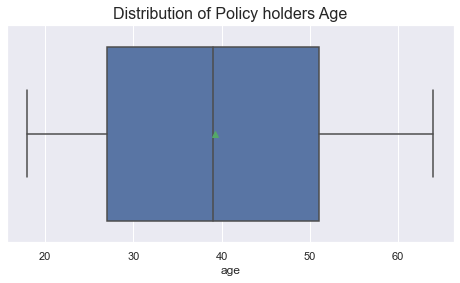

,Range,IQR,Skew,Standard deviation
Values,46.0,24.0,0.055,14.04


In [162]:
#Code for plotting a boxplot on Age
plt.figure(figsize=(8,4))# specifying the size of figure
ax = sns.boxplot(ins_data['age'],showmeans=True);#plot a boxpkot using age column data
ax.set_title('Distribution of Policy holders Age', fontsize = 16)#setting title
plt.show()#show plot
spread_distribution(ins_data['age'])#calling the spread_distribution() function

### Observations
We can observe that policy holders age ranges from 18 years to 64.<br>
The median is 39 years and the mean is also approximately 39 years.<br>
The inter quartile range of policy holders is in between 27yrs-51yrs and most occurring age is 18 years.<br>
The distribution of data is skewed slightly to the right with a skew value of 0.055. Also, there are no outliers.<br>

# What are the charges made by policy holders?
Visualization and observations of - Charges- using the Histplot and boxplot

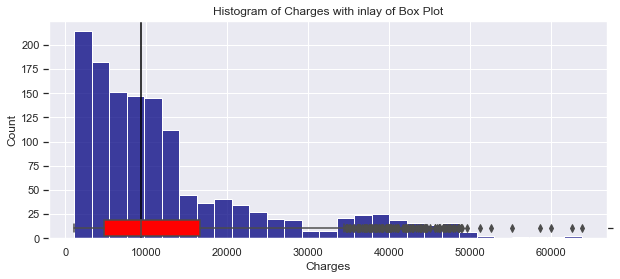

,Range,IQR,Skew,Standard deviation
Values,62648.55411,11911.37345,1.515,12110.36


In [163]:
plt.figure(figsize=(10, 4))#specifying the size of fiqure
ax = sns.histplot(ins_data['charges'],color = 'navy'); #using the seaborn histplot() function to plot histogram
ax2 = ax.twinx()# code to plot a twin plot 
sns.boxplot(x=ins_data['charges'], ax=ax2,boxprops=dict(facecolor="red"))#boxplot using the seaborn boxplot() function 
ax2.set(ylim=(-.5, 10))#setting the ylimits
ax.set(xlabel = 'Charges', ylabel = 'Count', title = 'Histogram of Charges with inlay of Box Plot')#setting the labels
ax.axvline(np.median(ins_data['charges']), color='black', linestyle='-')#plots the median
plt.show()
spread_distribution(ins_data['charges'])#calling the spread_distribution() function

### Observations
The minimum value of the charges is 1,121.87 dollars and the max value of the charges is 63,770 dollars and the mean charges is 13,279.12dollars.<br>
From the visual observations of the data through the histogram and box plot,we can safely say that most of the observations are in the first 6 classes, ranging from around 1121 dollars to around approximately 10,500 dollars.<br>
The median charge 9386.16 dollars. <br>
Around 30,000 there is a decrease in frequency but increses a little more as values of charges increase.Policy holders whose charges are more than 30,000 dollars are comparatively less(around 162 when compared to 1176of lower than 30000). <br>
We can also observe that the mean value is more than median, indicating a right skew, a positive value of 1.29.The box plot also shows that there are ouliers in the data to the right.

## How is the BMI distributed?
Visualization and observation of - BMI -using distplot

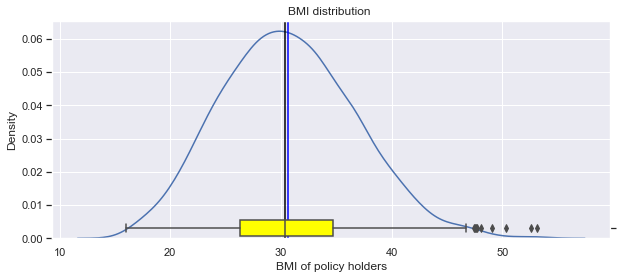

,Range,IQR,Skew,Standard deviation
Values,37.17,8.41,0.284,6.1


In [164]:
#plotting a distplot for BMI with mean and median
plt.figure(figsize=(10, 4))#figure size
ax = sns.distplot(ins_data['bmi'],hist= False) ; # plotting a distribution of BMI using the seaborn distplot() function 
ax2 = ax.twinx()#to create a twin Axes sharing the x-axis
sns.boxplot(x=ins_data['bmi'], ax=ax2,boxprops=dict(facecolor="yellow"));# creating a boxplot using the seaborn boxplot() function 
ax2.set(ylim=(-.5, 10))#setting y limits
ax.set(xlabel = 'BMI of policy holders', ylabel = 'Density', title = 'BMI distribution ')#adding labels
ax.axvline(np.median(ins_data['bmi']), color='black', linestyle='-')#plots the median
ax.axvline(np.mean(ins_data['bmi']), color='blue', linestyle='-')#plots the mean
plt.show()
spread_distribution(ins_data['bmi'])#calling the spread_distribution() function

#### Observations
The BMI of the policy holders is ranging from 15.96 to 53.13<br>
The average BMI of the policy holders is around 30.66.<br>
Also,The median BMI is 30.4<br>
The values are slightly right skewed with a value of 0.284.There are outliers to the right, indicating there are few policy holders with very high BMI.The BMI is fairly normally distributed.
On further research we can investigated the impact of BMI on charges.

# Bivariate Analysis
Comparing 2 variables

## Pairplot

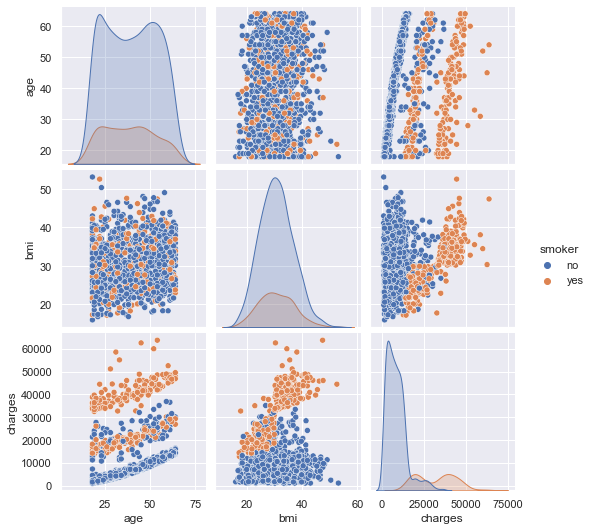

In [165]:
sns.pairplot(ins_data, hue='smoker' );# plots pairwise relationships between pairs of the variables of the DataFrame,by default numerical values are taken

#### Observations
As age is increasing, charges are increasing slightly.<br>
Between charges and children strong correlation is not seen.<br>
It is becoming obvious that there is huge impact the smokers have on charges.<br>
Bmi is not showing any particular impact between smokers and nonsmokers
In order to get better idea on strength of the correlation, a heatmap can be used.

## Heatmap

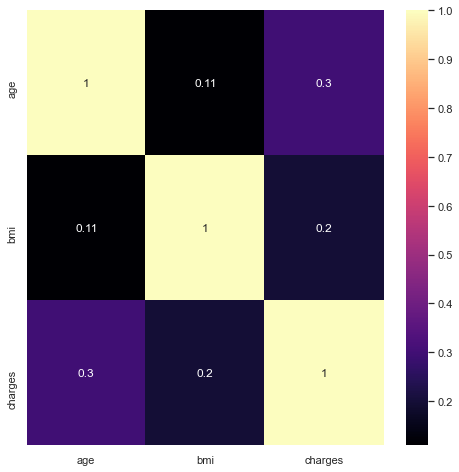

In [166]:
plt.figure(figsize=(8,8))
sns.heatmap(ins_data.corr(),annot=True,cmap='magma');#generates a heatmap with the corealation values

#### Observations

1. When observing the correlation, it is important to remember correlation does not imply causation.
2. The highest correlation is between age and Charges.
3. From the heatmap, we are unable to see very strong correlation values.
4. There are no negative correlation among the attributes.
5. There is very weak correlation between Age and children and also, charges and children.


# Let us see how the attributes impact the charges .
Charges VS the other attributes of the data set

## How does the number of children affect the claims?
Charges Vs  Children

In [169]:
#funtion to display the minimum value , maximum value the mean values and skew
def details(attribute,attribute2): #defining a function
    mean=ins_data.groupby(attribute)[attribute2].mean()#Series with median charges per attribute
    minimum=ins_data.groupby(attribute)[attribute2].min()#Series with minimum charges per attribute
    maximum=ins_data.groupby(attribute)[attribute2].max()#Series with maximum charges per attribute
    skew=ins_data.groupby(attribute)['charges'].skew()# skew values 
    feature_details= pd.merge(minimum,maximum ,right_index = True,left_index = True) #merging the minimum and maximum to make feature_details DataFrame
    feature_details=pd.merge(feature_details,mean,right_index=True,left_index=True)# merging the Median 
    feature_details=pd.merge(feature_details,skew,right_index=True,left_index=True)# merging the skew
    feature_details.columns = ['Minimum','Maximum','Mean','Skew' ]#Renaming the columns
    return(feature_details)

In [170]:
#displaying the minimum, maximum and Mean charges made by the policy holders according to children
details(ins_data['children'],'charges')#calling the function details()

,Minimum,Maximum,Mean,Skew
children,,,,
0,1121.8739,63770.42801,12384.695344,1.536854
1,1711.0268,58571.07448,12731.171832,1.676637
2,2304.0022,49577.66240,15073.563734,1.294031
3,3443.0640,60021.39897,15355.318367,1.473267
4,4504.6624,40182.24600,13850.656311,1.646488
5,4687.7970,19023.26000,8786.035247,1.244061


Text(0.5, 0, 'Total children')

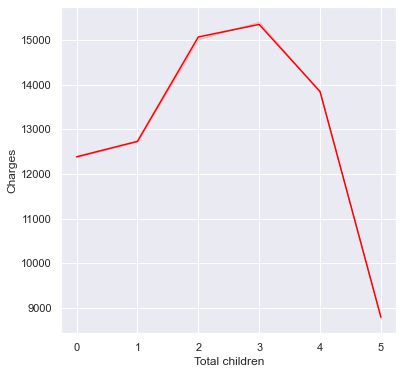

In [171]:
plt.figure(figsize=(6,6))#size for the figure
sns.lineplot(x="children", y="charges",ci=0,data=ins_data,color="RED")# lineplot for children and charges
plt.ylabel('Charges')#y label
plt.xlabel('Total children')# x label


#### Observations

- The mean charges per number of children can be observed above.
- The mean charges are differing as the number of children is changing.
- The highest charges are with policy holders who have 3 children.
- It is interesting to note that policy holders with with 5 children is lowest. The reason could be further investigated to find if what other factors may be influencing.
- Interestingly, the group with no children has the lowest price and the maximum price.May be indicating, number of children is not the major feature rhat impacts the calims of the policy holder.
- We can observe a right skew.

## Does gender have an influence on the claims made?
Charges Vs Sex

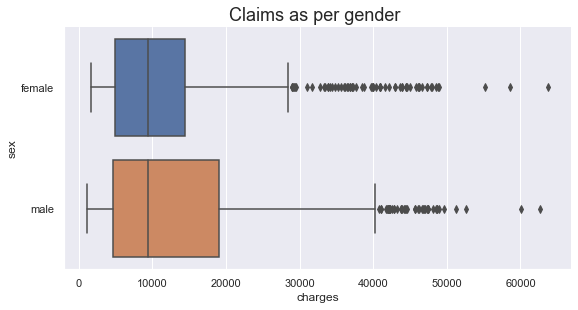

,Minimum,Maximum,Mean,Skew
sex,,,,
female,1607.5101,63770.42801,12569.578844,1.728944
male,1121.8739,62592.87309,13974.998864,1.334556


In [172]:
#box plot for charges and sex
#categorical plot with kind as box,height and aspect tells the size of plot
sns.catplot(x="charges", y='sex', kind="box",  data=ins_data,  height=4, aspect=2)
plt.title("Claims as per gender ", size=18)#title of the plot
plt.show()
details(ins_data['sex'],'charges')#calling the function details()


#### Observations

- From the visualization and from table we can observe the minimum, maximum and ,mean values of charges according to the gender.
- The Male policy holders have the least claim.
- The female policy holders have the highest claim.
- The mean charges made by the males are higher than the females.
- Both the genders have outliers to the right.<br>
- For both the genders the data is skewed to the right.


## Does  smoking have an impact on claims made?
Charges Vs Smoker

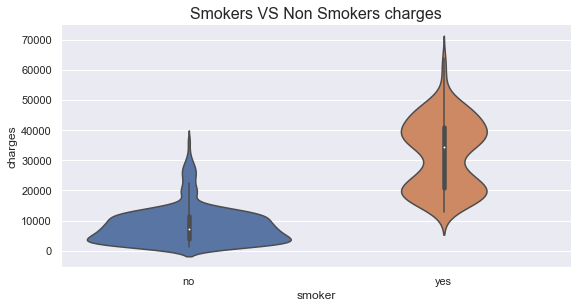

,Minimum,Maximum,Mean,Skew
smoker,,,,
no,1121.8739,36910.60803,8440.660307,1.538363
yes,12829.4551,63770.42801,32050.231832,0.128217


In [173]:
#catplot for claims and smoking 
sns.catplot(x="smoker", y='charges', kind="violin",  data=ins_data, height=4, aspect=2);
plt.title('Smokers VS Non Smokers charges',fontsize=16)#title for plot
plt.show()
details(ins_data['smoker'],'charges')#calling the details()function

#### Observations
- A huge difference on the charges is seen between the smokers and the non-smokers.
- Smokers have a Minimum charge of 12,829.45 dollars while non-smokers have a minimum charge of 1121.87 dollars. That is a percentage difference of 
- The maximum charges for smokers is 63,770 and for non-smokers it is 36,910.60.That is a  big difference between them.
- The mean charges for the Smokers is only 8440.66 while the charges for the smokers is 32,050.23
- Further inference on the data will give us clearer idea if smoking has influence on charges with a statistical significance.
- The data is skewed to the right for both the categories.

## How is age affecting the charges ?
Charges Vs Age

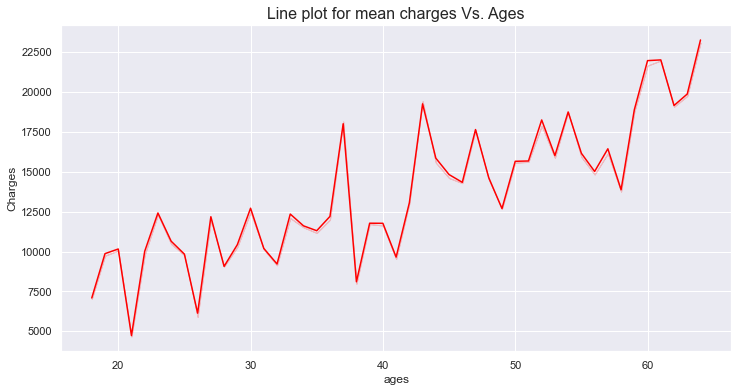

In [176]:
plt.figure(figsize=(12,6))# determing the size of figure
sns.lineplot(x="age", y="charges",ci=0,data=ins_data,color="RED")#lineplot for the ages and charges
plt.ylabel('Charges')# ylabel
plt.xlabel('ages')#x label
plt.title('Line plot for mean charges Vs. Ages',fontsize=16)#title for plot
plt.show()

In [177]:
#Printing the maximum, minimum and average charges of policy holders who have the least and highest mean charges
df_age=details(ins_data['age'],'charges')
min_meancharges=df_age[df_age.Mean == df_age.Mean.min()]#least mean charges
max_meancharges=df_age[df_age.Mean == df_age.Mean.max()]#least mean charges
print('Minimum mean charges:\n',min_meancharges)
print('Maximum mean charges:\n',max_meancharges)


Minimum mean charges:
        Minimum      Maximum        Mean      Skew
age                                              
21   1515.3449  26018.95052  4730.46433  2.452523
Maximum mean charges:
        Minimum     Maximum          Mean      Skew
age                                               
64   13822.803  49577.6624  23275.530837  1.232085


#### Observation
- As the age of the policy holder is increasing,there is a difference in the charges and they are gradually increasing.<br>
- The policy holders ages are ranging from 18-64 years.<br>
- The minimum charges, around 1121.87 are claimed by the 18 years old.<br>
- The highest charge,63,770.42 is made by policy holder who is 54 years .To clearly indicate the reason for high claims by this policy holder, further analysis should be done to see if other attributes like smoking, bmi, gender or dependents is affecting the charges along with age.<br>
- However, as observed from the lineplot from above, the least of mean charges, is from the age group of 21 and the value of the charges is 5730.46 dollars.
- The maximum mean charges are from the age group of  64 year olds and the mean charges are 23275.53 dollars.
- There is dip in the charges around the ages of 40, on further analysis, we found that there are 124 non smokers and only 30 smokers. May be indicating smoking has a higher influence on charges more than age attribute.

## ## How are claims differing based on region?
Charges Vs Region

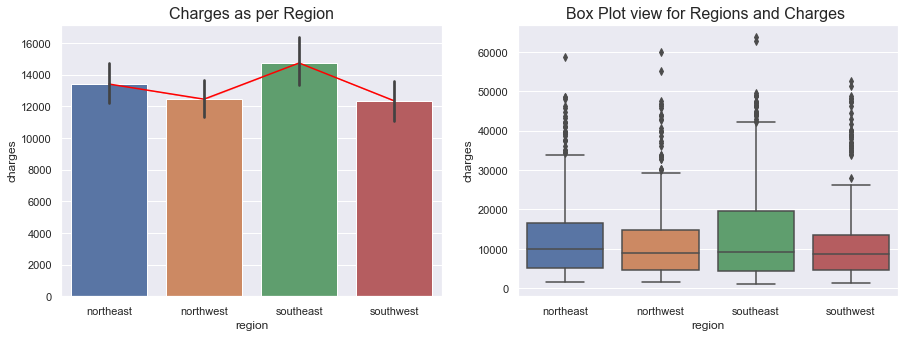

,Minimum,Maximum,Mean,Skew
region,,,,
northeast,1694.7964,58571.07448,13406.384516,1.493360
northwest,1621.3402,60021.39897,12450.840844,1.680491
southeast,1121.8739,63770.42801,14735.411438,1.251265
southwest,1241.5650,52590.82939,12346.937377,1.682222


In [178]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))# determing the size of figure and number of subplots
sns.lineplot(x="region", y="charges",ci=0,data=ins_data,color="RED",ax=ax[0])#lineplot for the region and charges
sns.barplot(x="region", y="charges",data=ins_data, ax=ax[0])#barplot of same valuesthe region and charges
sns.boxplot(x="region", y='charges', data=ins_data, ax=ax[1]);#boxplot of the region and charges
ax[0].set_title('Charges as per Region',fontsize=16)#title specifications for 1st plot
ax[1].set_title('Box Plot view for Regions and Charges ',fontsize=16)#title specifications for 2nd plot
plt.show()
details(ins_data['region'],'charges')#calling details() functions

#### Observations
The minimum, maximum and mean charges per region can be seen in the table.<br>
The southeast region has both the least and also the most charges per region, making it the region also with the highest mean charges.<br>
Northeast and northwest regions have almost similar values with maximum and minimum.<br>
Southwest ans northwest have almost similar mean values for charges.<br>
The charges for all the northeast are ranging from 1694.79 to 58571.07, northwest is ranging from 1621.34 to 60021.39 dollars, southeast are ranging from 1121.87 and 63770.42 dollars and for the southwest they are ranging from 1241.56 to 52590.82 dollars.<br>
For all the regions the data is skewed to the right and there are there are outliers present in all the regions.<br>

## Does BMI have effect on the charges?
Charges Vs BMI

In [179]:
#splitting the data frame into 3 dataframes according to healthy bmi,Over the healthy bmi and under the healthy bmi
ideal=ins_data[(ins_data['bmi']<=24.9) & (ins_data['bmi']>=18.5)]#dataframe with healthy bmi
over_ideal = ins_data[ins_data['bmi']>24.9]#dataframe with over healthy bmi
under_ideal= ins_data[ins_data['bmi']<18.5]#dataframe with under bmi

<Figure size 1584x864 with 0 Axes>

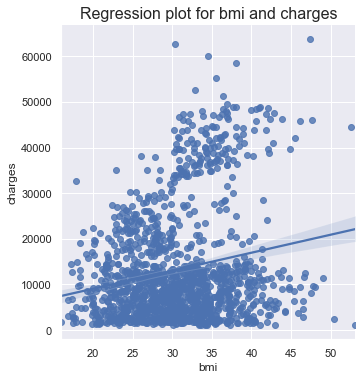

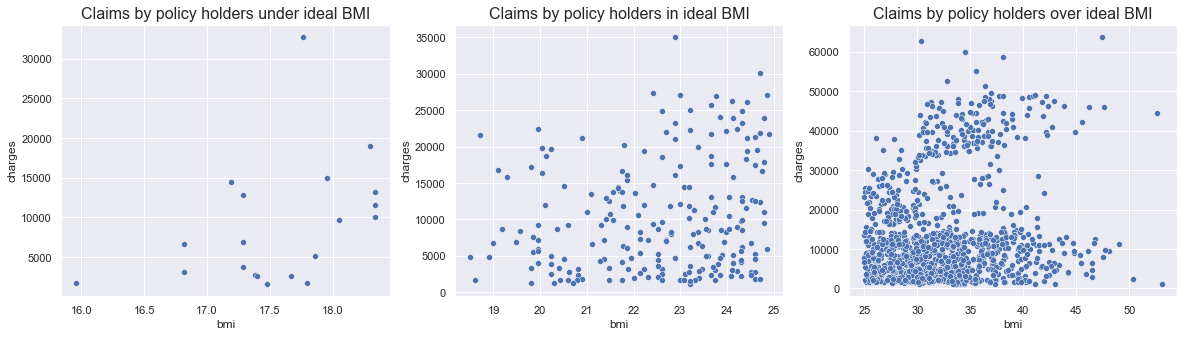

,Minimum,Maximum,Mean,Skew
bmi,,,,
15.960,1694.79640,1694.79640,1694.796400,NaN
16.815,3167.45585,6640.54485,4904.000350,NaN
17.195,14455.64405,14455.64405,14455.644050,NaN
17.290,3732.62510,12829.45510,7813.353433,0.873735
17.385,2775.19215,2775.19215,2775.192150,NaN
...,...,...,...,...
48.070,9432.92530,9432.92530,9432.925300,NaN
49.060,11381.32540,11381.32540,11381.325400,NaN
50.380,2438.05520,2438.05520,2438.055200,NaN


In [180]:
#regression plot for bmi and charges
plt.figure(figsize=(22,12))
sns.lmplot(x="bmi", y="charges", data=ins_data)
plt.title('Regression plot for bmi and charges', fontsize=16)#title for plot

# Plotting scatter plots with the new dataframes
fig, ax =plt.subplots(1,3,figsize=(20, 5))# size of figure
sns.scatterplot(x="bmi", y="charges", data=under_ideal,ax=ax[0])# scatter plot for under bmi
sns.scatterplot(x="bmi", y="charges", data=ideal,ax=ax[1])# scatter plot for normal bmi
sns.scatterplot(x="bmi", y="charges", data=over_ideal,ax=ax[2])# scatter plot for policy holders over normal bmi
ax[0].set_title('Claims by policy holders under ideal BMI',fontsize=16)#setting title
ax[1].set_title('Claims by policy holders in ideal BMI',fontsize=16)#setting title
ax[2].set_title('Claims by policy holders over ideal BMI', fontsize=16)#setting title
plt.show()
# calling the details function for the min,max and avg values
details(ins_data['bmi'],'charges')#calling details() functions


#### Observations
Among the policy holders with lower than BMI of 18.5, there are 20 such policy holders in our data. Their charges are ranging from 1621.34 to 32,734. But 50% of the charges are between 2751.63 to 12,923 indicating there many be outliers to data to higher prices. The mean charges are 8852.20 and median charges are 6759.26 indicating a right skew to the distribution. <br>
For the ideal BMI between 18.5 to 24.89 , there are 222 policy holders in our data set. There charges are ranging from 1121.87 and 35069.37. The mean charges are at 10,379.49 and median charges are 8604.15 indicating there may a right skew to data.50% of the data is between 4057.70 and 15,197.26 indicating there are outliers to the right.<br>
There are 1095 policy holders whose BMI can be considered as higher than normal range(between 24.97 to 53.13). The minimum charges are 1131.50 and a maximum of 63770.42 dollars. The mean charges are around 13947.84 and the median charges are 9563.02 indicating a right skew. Also the max charges are very further than the 75% indicating outliers in the data.
Observation can be made that as the BMI is increasing the mean charges are increasing.But is this beacuse of bmi or because of bmi increasing with age.Further investigation with multivariata analysis can give more clear answers.


## Answering the key questions :

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 

In [187]:
details(ins_data['smoker'],'charges')

,Minimum,Maximum,Mean,Skew
smoker,,,,
no,1121.8739,36910.60803,8440.660307,1.538363
yes,12829.4551,63770.42801,32050.231832,0.128217


## Calculating statistically:-

### Step 1:  null and alternative hypothesis:

##### Null Hypothesis: The medical claims made by smokers is less or same as claims of nonsmokers.<br>
##### Alternate Hypothesis:The medical claims made by smokers is more than claims of nonsmokers.

- Ho = $\mu_{smoker} - \mu_{non smoker} <= 0$      

- Ha = $\mu_{smoker} - \mu_{non smoker} > 0$

H0  suggests that both smoker mean claims($\mu_{smoker}$) and non-smoker($\mu_{non smoker}$) mean claims are same.<br>
Ha  suggests that smoker mean claims($\mu_{smoker}$) are more than non-smoker($\mu_{non smoker}$) mean claims.

### Step 2:  significance level

The level of significance (Alpha ) = 0.05.

### Step 3: Identify the test statistic

- The sample size which is sufficiently large for a Zstat Test.

- But since the population standard deviation (Sigma) is unknown, we have to use a Tstat test.

- we will assume that the population variance of samples are equal.

- Since the sole purpose of the test is to check whether the medical claims made by smokers is more when compared to non smokers, we would prefer a Right tailed T Test. Here the samples are independent.

- 2 sample right tailed Ttest

### Step 4: Calculate p value

In [188]:
#Create 2 samples smoker, and  non - smoker
ins_data_smoker = ins_data[ins_data.smoker=='yes']
ins_data_nonsmoker = ins_data[ins_data.smoker=='no']

t_stat, p_value = ttest_ind(ins_data_smoker['charges'] , ins_data_nonsmoker['charges'])

In [189]:
#this is sigle tailed(right tailed), so p value is divided by 2, as default we get 2 tailed p value
print ('The T statistic is:',t_stat,'\n''The corresponding pvalue is :',(p_value/2))# printing the values

The T statistic is: 46.64479459840305 
The corresponding pvalue is : 7.033610474688249e-283


In [190]:
if p_value/2 > 0.05:
	print('P value is greater than significance level (fail to reject H0)')
else:
	print('P value is less than significance level (reject H0)')

P value is less than significance level (reject H0)


### Step 5:  Rejecting  or accepting the  null hypothesis

In this calculation, p value is very very small 4.1357179210886093e-283 and also it is less than our chosen level of signifance at 0.05.

So the statistical decision is to reject the null hypothesis at 5% level of significance.

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

Visualizing the data graphically

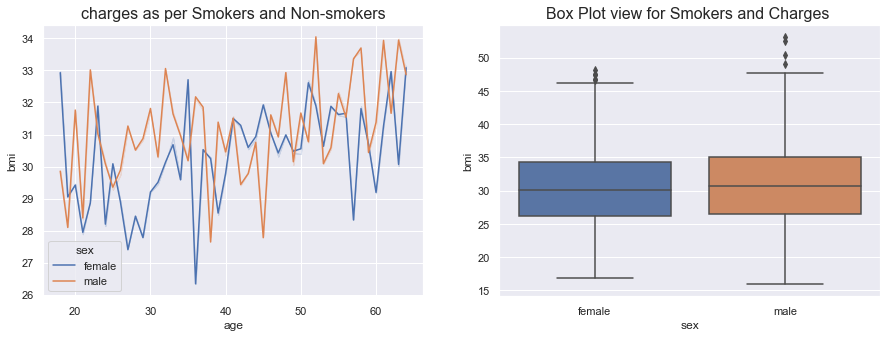

In [191]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))# determing the size of figure and number of subplots
sns.lineplot(x="age", y="bmi", hue="sex",ci=0, data=ins_data,ax=ax[0]);#lineplot for the age and bmi
sns.boxplot(x='sex', y='bmi', data=ins_data, ax=ax[1])
#sns.catplot(x = 'smoker', y = 'charges', hue = 'smoker',data = ins_data, kind = 'box', ax=ax[1]);#boxplot
ax[0].set_title('charges as per Smokers and Non-smokers',fontsize=16)#title specifications for 1st plot
ax[1].set_title('Box Plot view for Smokers and Charges ',fontsize=16)#title specifications for 2nd plot
plt.show()

In [192]:
details(ins_data['sex'],'bmi')

,Minimum,Maximum,Mean,Skew
sex,,,,
female,16.815,48.07,30.377749,1.728944
male,15.960,53.13,30.943652,1.334556


## Calculating statistically:-

### Step 1:  Null and alternative hypothesis:

##### Null Hypothesis: The means of both the males and females BMI is equal<br>
##### Alternate Hypothesis:The means of both the males and females BMI is unequal.<br>

- Ho = $\mu_{male} = \mu_{female}$      

- Ha = $\mu_{male} != \mu_{female}$

H0  suggests that both males mean BMI($\mu_{male}$) and female mean BMI($\mu_{female}$) are same.<br>
Ha  suggests that both males mean BMI($\mu_{male}$) and female mean BMI($\mu_{female}$) are not same.<br>

### Step 2:  significance level

The level of significance (Alpha ) = 0.05.

### Step 3: Identify the test statistic

- The sample size which is sufficiently large for a Zstat Test.

- But since the population standard deviation (Sigma) is unknown, we have to use a Tstat test.

- We will assume that the population variance of samples are equal.

- Since the purpose of the test is to check whether the BMI of males and females differ, we prefer two tailed T Test. Here the samples are independent.

- 2 Sample ,2 tailed T-test is the test we are performing.

### Step 4: Calculate p value

In [193]:
#Create 2 samples with male and female BMIs
ins_data_male = ins_data[ins_data.sex=='male']#all observations of males
ins_data_female = ins_data[ins_data.sex=='female']#dataframe for all the female observations
t_stat, p_value = ttest_ind(ins_data_male['bmi'] , ins_data_female['bmi'])# ttest for 2 independent samples, bmi of males and females are tested

In [194]:
print ('The T statistic is:',t_stat,'\n''The corresponding pvalue is :',(p_value))#p value is for two tailed- given by default

The T statistic is: 1.6970672301298684 
The corresponding pvalue is : 0.08991704324931137


In [195]:
if p_value > 0.05:
	print('Fail to reject Null hypothesis')
else:
	print('Reject Null hypothesis)')

Fail to reject Null hypothesis


### Step 5:  Rejecting  or accepting the  null hypothesis

In this calculation, p value is 0.0899 and it is more than our chosen level of signifance at 0.05.

So the statistical decision is to fail to reject the null hypothesis at 5% level of significance.



## $$ Insights $$

In conclusion:
- There are more nonsmokers than smokers.
- The charges are highest among the smoking policy holders than the nonsmoking policy holders.
- We have with statistical significance, have shown that smokers have increased medical claims.
- With statistical evidence we have indicated that the BMI of females is not different from that of males.
- With statistical evidence we also concluded that there is no difference in the proportions of smokers across different regions.
- In terms of mean BMI of women with no children, one child, and two children, with statistical evidence we have shown that they all are same.

